## Ideas

- balance the classes with upsampling ? probably no, as we won't be able to create resonable upsamples.
- another indication that all features are needed is that bayes_search on BaggingClassifier shows optimal results neat max_features=1.0
- use PI feature importance to deduce coef weights for manual LogisticRegression ? Compare heavy bagging LR mean coef with PI!

In [1]:
%load_ext autoreload
%autoreload 2

import sys

# implementation of reverse_shuffle
sys.path.insert(0, "/Users/user/git/eli5/")
import eli5

sys.path.insert(0, "/Users/user/git/datasci")
from sci.metrics import rmse, rmse_score, neg_rmse_score
import sci.plots as scip
import sci.learn as scil

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)


import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points
pd.options.display.max_rows = 1000

random_state = 7

modified eli5
modified PermutationImportance sklearn


/Users/user/miniconda3/envs/test2/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Load Data

In [2]:
data = scil.load_data("processed_min", random_state=random_state)

print("train:", data.X_train.shape)
print("test:", data.X_test.shape)

(250, 300) (250,)
train: (200, 300)
test: (50, 300)


## Choose Model

In [3]:
from sklearn.model_selection import *

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier, XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from MeanModels import MeanModelsClassifier, MeanModelsRegressor
from StackingAveragedModels import StackingAveragedModels

from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.base import clone

In [4]:
my_xgb = XGBClassifier()
my_xgb.set_params(**{'colsample_bylevel': 0.6283406289408499, 'colsample_bytree': 0.9768489288084437, 'gamma': 0.00013008480929036203, 'learning_rate': 0.014982462701190634, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 1201, 'reg_alpha': 0.007084216407200271, 'reg_lambda': 1.1962697395436332e-09, 'subsample': 0.8732097955363425})

models = {}
models['my_xgb'] = my_xgb


model = my_xgb

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

models_sk = {
    "KNN": KNeighborsClassifier(3),
    "SVC-linear": SVC(kernel="linear", C=0.0001316080372376561, probability=True),
    "SVC-rbf-def": SVC(kernel="rbf", probability=True),
    "SVC-rbf1": SVC(kernel="rbf", C=0.3456525257377223, gamma='auto', probability=True),
    "SVC-rbf2": SVC(kernel="rbf", C=9.899681694580002, gamma=9.774612226707497e-06, probability=True),
    "GaussianProcessClassifier": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "DecisionTreeClassifier-def": DecisionTreeClassifier(),
    "DecisionTreeClassifier-5": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier-def": RandomForestClassifier(),
    "RandomForestClassifier-1": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "MLP": MLPClassifier(alpha=1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SGDClassifier": SGDClassifier(loss='modified_huber'),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(max_iter=1e10, n_jobs=10),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "NuSVC": NuSVC(probability=True),
}

models_sk['LogisticRegression'].set_params(**{'solver': 'newton-cg', 'C': 0.10525261119806098, 'intercept_scaling': 0.0004619865290222267, 'tol': 0.009103808108589405})



from mlxtend.classifier import StackingCVClassifier
meanModel_sk = MeanModelsClassifier(dict(models_sk), random_state=1)
stackModel_sk = StackingCVClassifier(list(models_sk.values()), LogisticRegression())
stackModel_sk2 = StackingCVClassifier(list(models_sk.values()), LogisticRegression(), use_probas=True)

models_sk_meta = {}
models_sk_meta['meanModel_sk'] = meanModel_sk
models_sk_meta['stackModel_sk'] = stackModel_sk
models_sk_meta['stackModel_sk2'] = stackModel_sk2

models_sk_all = {**models_sk, **models_sk_meta}


In [6]:
scil.random_state(models_sk, random_state)

In [10]:
model_lr = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear') # LB 0.848
model_lr_bagging_1 = BaggingClassifier(model_lr, n_estimators=20, max_samples=0.95, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.849
model_lr_bagging_2 = BaggingClassifier(model_lr, n_estimators=25, max_samples=0.97435, bootstrap=True, n_jobs=-2, random_state=random_state) # LB 0.831
model_lr_bagging_3 = BaggingClassifier(model_lr, n_estimators=12, max_samples=0.8, bootstrap=True, n_jobs=-2, random_state=random_state) # LB 0.828
model_lr_bagging_4 = BaggingClassifier(model_lr, n_estimators=258, max_samples=0.941283072066677, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.848
model_lr_bagging_5 = BaggingClassifier(model_lr, n_estimators=10000, max_samples=0.95, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.849

model_lr2 = LogisticRegression(class_weight='balanced', penalty='l1', C=0.122, solver='saga') # LB 0.847
# model_lr_bagging_1 works better than model_lr_bagging_2 on LB, and model_lr_bagging_3 even worse. why?
# is it the bootstrap tha causes this?


models_best = {}
models_best['model_lr'] = model_lr
# models_best['model_lr_bagging_1'] = model_lr_bagging_1



### Pipeline

In [322]:
mm = make_pipeline(
#     SelectFromModel(model_lr, threshold=0.000000001, prefit=False), 
    make_union(
        FunctionTransformer(),
        FunctionTransformer(lambda X: np.power(X, 2)),
        FunctionTransformer(lambda X: np.exp(X)),
    ),
    model_lr)

### end of models

In [11]:
models_comp = {**models_sk, **models_best}

## Setup

In [8]:
from mlxtend.evaluate import BootstrapOutOfBag, RandomHoldoutSplit
from sklearn.metrics import *

metric = roc_auc_score
scoring = 'roc_auc'

scil.metric_global = metric
scil.scoring_global = 'roc_auc' # make_scorer(scil.metric_global, needs_proba=True)

# format
# cv_{total_splits}_{train/test-fold}
cv_1_10 = RandomHoldoutSplit(valid_size=0.1, stratify=True, random_seed=None)
cv_5_5 = 5
cv_10_10 = 10
cv_1000_10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=100)
cv_1000_20 = RepeatedStratifiedKFold(n_splits=20, n_repeats=50)

cv_single = cv_1_10
cv_fast = cv_10_10
cv_slow = cv_1000_20

## Analyze

CV for KNN ..
CV for SVC-linear ..
CV for SVC-rbf-def ..
CV for SVC-rbf1 ..
CV for SVC-rbf2 ..
CV for GaussianProcessClassifier ..
CV for DecisionTreeClassifier-def ..
CV for DecisionTreeClassifier-5 ..
CV for RandomForestClassifier-def ..
CV for RandomForestClassifier-1 ..
CV for MLP ..
CV for AdaBoostClassifier ..
CV for SGDClassifier ..
CV for GaussianNB ..
CV for BernoulliNB ..
CV for LDA ..
CV for QDA ..
CV for LogisticRegression ..
CV for GradientBoostingClassifier ..
CV for NuSVC ..
CV for model_lr ..


,mean,std
GaussianProcessClassifier,0.50000,0.00000
QDA,0.52083,0.03869
RandomForestClassifier-1,0.55625,0.02668
RandomForestClassifier-def,0.56215,0.03992
KNN,0.56389,0.05815
DecisionTreeClassifier-5,0.59618,0.03528
DecisionTreeClassifier-def,0.60972,0.03413
LDA,0.65417,0.01719
GradientBoostingClassifier,0.65764,0.02324
BernoulliNB,0.65972,0.04618


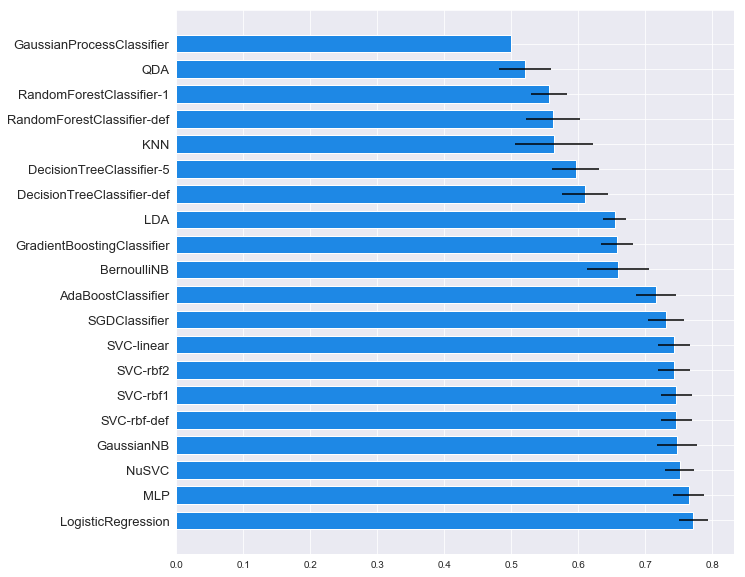

In [12]:
scil.score_cv(data, models_comp, cv=cv_fast)

## Learning Curve

CV for LogisticRegression ..


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    2.3s
[Parallel(n_jobs=11)]: Done  79 out of 100 | elapsed:    2.5s remaining:    0.7s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    2.5s finished


,mean,std
LogisticRegression,0.78741,0.00575


Can't plot with only a single or no samples
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for BaggingClassifier ..


[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    1.8s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    4.9s finished


,mean,std
BaggingClassifier,0.81043,0.00496


Can't plot with only a single or no samples


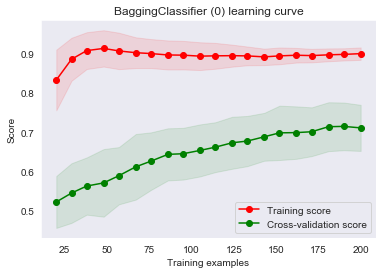

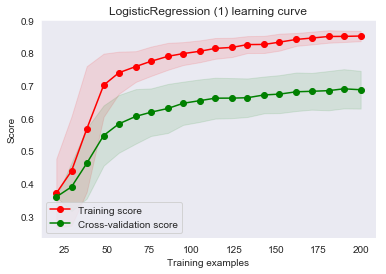

In [40]:
scip.learning_curve(data, [model_lr_bagging, model_lr])

## Model Calibration

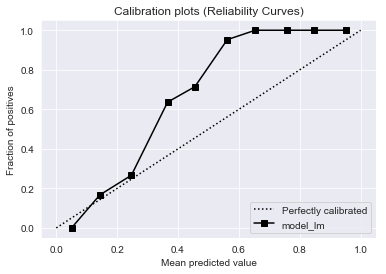

In [476]:
scip.calibration(data, model_lr)

## Model Curves

In [484]:
models = model_lr
scil.fit(data, models)

fitting LogisticRegression ..


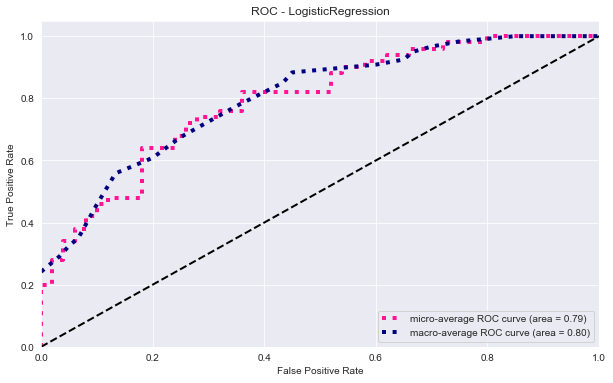

In [488]:
scip.roc_curve(data, models)

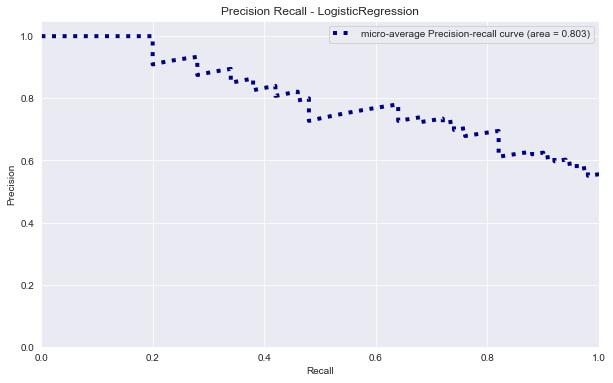

In [490]:
scip.precision_recall_curve(data, models)

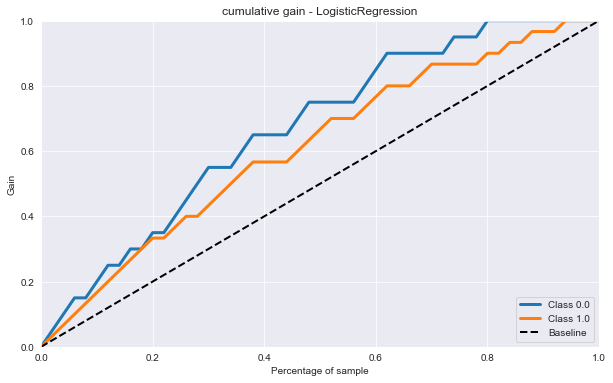

In [491]:
scip.cumulative_gain(data, models)

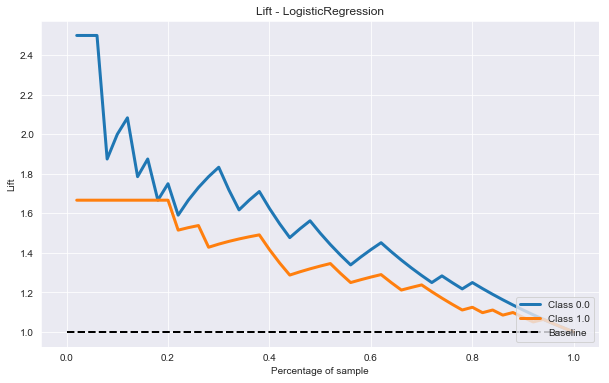

In [492]:
scip.lift_curve(data, models)

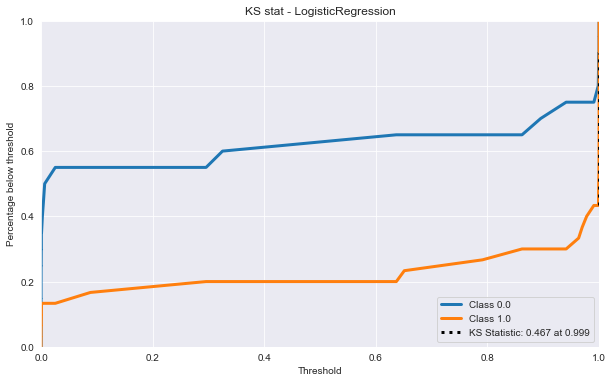

In [493]:
scip.ks_statistic(data, models)

## Incremental Model Combination

In [151]:
# cv = 5
models = models_comp
scoring = scil.scoring_global

try:
    scores = scil.score(data, models, scoring, show=False)
    print('using existing fit for model scores')
except:
    print('fitting to get model scores')
    scores = scil.fit_score(data, models, scoring, show=False)
    
sorted_scores = sorted(scores.items(), key=lambda kv: -kv[1])

sub_models = {}
scores_inc = []
names_inc = []
for k, _ in sorted_scores:
    sub_models[k] = models[k]
    meanModel = MeanModelsClassifier(dict(sub_models), fit_models=False)
    score = scil.fit_score(data, meanModel, scoring, show=False)['MeanModelsClassifier']
    scores_inc.append(score)
    names_inc.append(k)
    
    
res = pd.Series(scores_inc, index=names_inc)

res
    

using existing fit for model scores
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..
fitting MeanModelsClassifier ..


SVC-linear                   0.80167
SVC-rbf2                     0.80167
LogisticRegression           0.81167
SVC-rbf-def                  0.81333
SVC-rbf1                     0.81000
NuSVC                        0.80667
AdaBoostClassifier           0.80500
MLP                          0.80667
model_lr                     0.81000
model_lr_bagging_1           0.81000
GaussianNB                   0.81333
GradientBoostingClassifier   0.82000
DecisionTreeClassifier-def   0.84833
DecisionTreeClassifier-5     0.85167
LDA                          0.83667
QDA                          0.83000
KNN                          0.82167
GaussianProcessClassifier    0.82167
RandomForestClassifier-def   0.81167
RandomForestClassifier-1     0.80833
dtype: float64

In [167]:
# cv = 5
models = models_comp
scoring = scil.scoring_global
cv = cv2

scores = scil.score_cv(data, models, scoring, show=False, cv=cv)
scores_mean = scores.mean().sort_values(ascending=False)    

sub_models = {}
scores_inc = []
names_inc = []
for k, _ in scores_mean.items():
    sub_models[k] = models[k]
    meanModel = MeanModelsClassifier(dict(sub_models), fit_models=True)
    score = scil.score_cv(data, meanModel, scoring, show=False, cv=cv).iloc[:, 0]
    scores_inc.append(score)
    names_inc.append(k)
    
    
res = pd.Series(scores_inc, index=names_inc)

res
    

CV for KNN ..


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    2.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.7s


CV for SVC-linear ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.6s


CV for SVC-rbf-def ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.6s


CV for SVC-rbf1 ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.5s


CV for SVC-rbf2 ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for GaussianProcessClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    1.3s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for DecisionTreeClassifier-def ..
CV for DecisionTreeClassifier-5 ..


[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.3s


CV for RandomForestClassifier-def ..
CV for RandomForestClassifier-1 ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MLP ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    3.9s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for AdaBoostClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.9s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.3s


CV for GaussianNB ..
CV for LDA ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for QDA ..
CV for LogisticRegression ..


[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for GradientBoostingClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    1.8s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.1s remaining:    0.8s


CV for NuSVC ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   4 out of  25 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for model_lr ..
CV for model_lr_bagging_1 ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.7s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    1.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    1.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    1.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    1.8s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    2.0s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    2.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    2.4s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    5.3s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    5.9s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:   10.3s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    9.7s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    8.5s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    8.6s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    8.7s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    8.5s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    7.9s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    9.3s finished
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


CV for MeanModelsClassifier ..


[Parallel(n_jobs=11)]: Done  25 out of  25 | elapsed:    9.2s finished


model_lr                      0    0.86806
1    0.80729
2    0.69965
3    0....
model_lr_bagging_1            0    0.80729
1    0.79514
2    0.74479
3    0....
SVC-rbf-def                   0    0.85417
1    0.86458
2    0.87847
3    0....
NuSVC                         0    0.78646
1    0.84201
2    0.74826
3    0....
SVC-rbf1                      0    0.72743
1    0.84549
2    0.85590
3    0....
LogisticRegression            0    0.84028
1    0.77604
2    0.79167
3    0....
SVC-linear                    0    0.76215
1    0.85590
2    0.76042
3    0....
SVC-rbf2                      0    0.83507
1    0.78819
2    0.69271
3    0....
GaussianNB                    0    0.81944
1    0.76215
2    0.78299
3    0....
MLP                           0    0.89583
1    0.76215
2    0.71701
3    0....
AdaBoostClassifier            0    0.78819
1    0.79340
2    0.77604
3    0....
GradientBoostingClassifier    0    0.72743
1    0.74479
2    0.83681
3    0....
LDA                           0    0.758

In [251]:
# scores = scores.sort_values(ascending=False)    
scores = scores.iloc[:, np.argsort(-scores.mean())]

mean_scores = pd.DataFrame(scores_inc).T
mean_scores.columns = names_inc

plot_range(scores, "g")
plot_range(mean_scores, "r")
plt.xticks(rotation='vertical')

AttributeError: 'list' object has no attribute 'iloc'

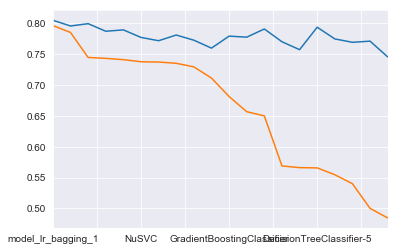

In [153]:
import matplotlib.pyplot as plt
res.plot()
scores.plot()

In [ ]:
score2 = sci.fit_score(data, my_stackModel, rmse)

In [162]:
score2 = sci.score(data, stackModel_sk, show=False)
score_stack = score2['StackingCVClassifier']

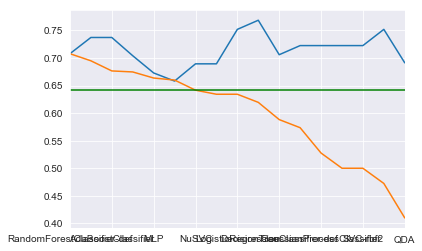

In [163]:
import matplotlib.pyplot as plt
res.plot()
plt.plot([p[1] for p in sorted_scores])

plt.axhline(score_stack, color='g')

## Manual Model

Mean: -0.124777
Std: 0.255700
Skewness: -0.487348
Kurtosis: 0.206776


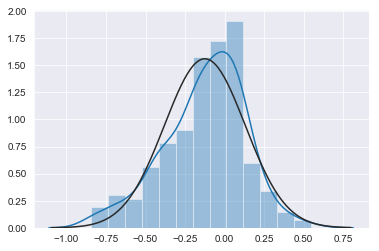

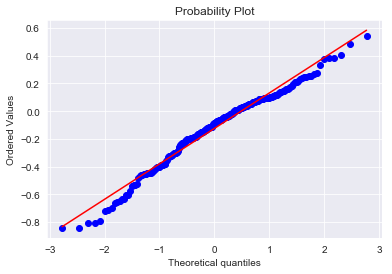

In [349]:
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

cors = data.X.corrwith(data.y)
# np.sum(data.X * cors, axis=0)
mul = data.X @ cors
pred = sigmoid(mul)
# scip.normality(mul)
# pred = (mul > 0) * 1
scip.normality(pred - data.y)

Mean: 0.089911
Std: 0.978001
Skewness: -0.093826
Kurtosis: -0.112237


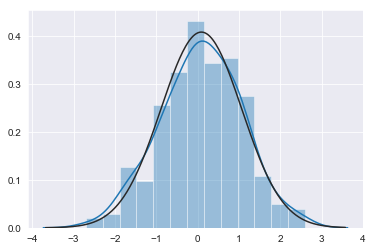

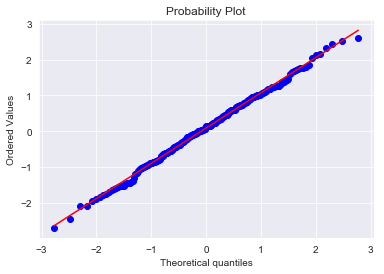

In [341]:
scip.normality(np.random.normal(0, 1, 250))

In [401]:
lr = LinearRegression()
model_lr.set_params(C=1000000000000000)
scil.fit(data, lr, all_data=True)
scil.score(data, lr)

fitting LinearRegression ..


LinearRegression   1.00000
dtype: float64

Can't plot with only a single or no samples


Mean: 0.501859
Std: 0.252740
Skewness: -0.016816
Kurtosis: -1.083228
fitting LogisticRegression ..
Mean: 0.639992
Std: 0.479984
Skewness: -0.583333
Kurtosis: -1.659722


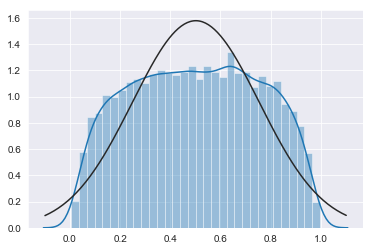

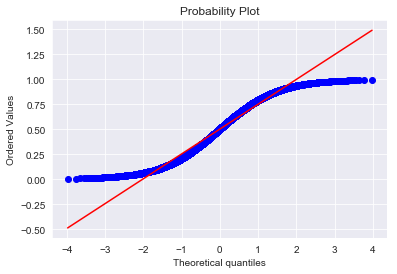

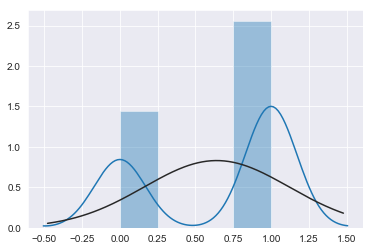

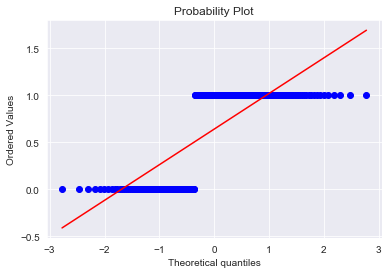

In [369]:
scip.normality(y_pred)
scip.normality(model_lr.predict_proba(data.X)[:, 1])

## Final & Submit

0.5018587489639493

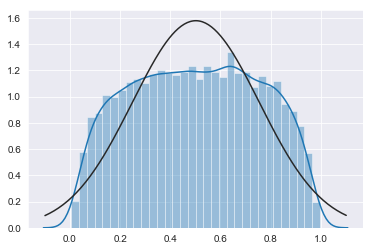

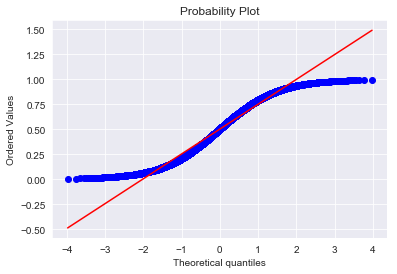

In [473]:
mul = data.X_score @ cors
y_pred = sigmoid(mul)
scip.normality(y_pred)
y_pred.mean()

In [463]:
model_lr.set_params(C=10000000000)
scil.fit(data, model_lr, all_data=True)

fitting LogisticRegression ..


In [465]:
model_lr.coef_ = cors.values.reshape(1, 300)
model_lr.intercept_[0] = 0

# print(model_lr.coef_.shape)
# print(cors.reshape(1, 300).shpe)

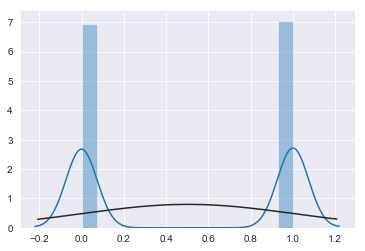

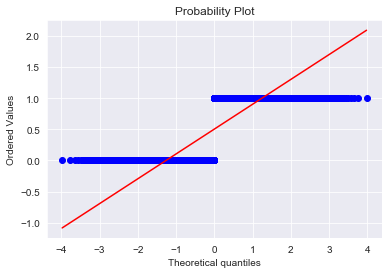

In [469]:
# y_pred = model_lr.predict_proba(data.X_score)[:, 1]
y_pred = model_lr.predict(data.X_score)

# scil.score(data, model_lr)
# plt.plot(sorted(model_lr.coef_[0, :]))
# plt.plot(sorted(lr.coef_))
# plt.plot(sorted(cors))
# model_lr.predict_proba(data.X)

scip.normality(y_pred)

In [67]:
final_model = model_lr_bagging_5
scil.fit(data, final_model, all_data=True)
# y_pred = final_model.predict(data.X_score)
y_pred = final_model.predict_proba(data.X_score)[:, 1]

fitting BaggingClassifier ..


## Submit

In [470]:
# save submission using samples Ids
index = pd.read_csv('data/sample_submission.csv')["id"]
df_score = pd.DataFrame({"id": index, "target": y_pred})
df_score.to_csv('data/submission.csv', index=False)